In [1]:
import warnings
import itertools 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import calendar
import datetime

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_violencia_2015_2020.csv')

## Se filtraron los datso para analizar unicamente elos homicidios 

In [3]:
data_hom = data[data['Tipo de delito']=='Homicidio']

 Ver formato del nombre de las columnas y cambiarlo por uno adecuado

In [4]:
data_hom.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [5]:
data_hom2 = data_hom.rename({'Año': 'Anio', 'Cve. Municipio':'Clave_Municipio',
                'Bien jurídico afectado':'Bien_juridico_afectado', 'Tipo de delito':'Tipo_de_delito', 
                'Subtipo de delito':'Subtipo_de_delito'}, axis=1)

In [6]:
data_hom2

,Anio,Clave_Ent,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346524,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
1346525,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,...,0,0,0,0,0,0,0,0,0,0
1346526,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,0,...,0,0,0,0,0,0,0,0,0,0
1346527,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con otro elemento,0,...,0,0,0,0,0,0,0,0,0,0


Se eliminaron las columnas que no se utilizaran para el analisis 

In [7]:
data_hom3 = data_hom2.drop(columns=['Bien_juridico_afectado', 'Subtipo_de_delito', 
                                    'Modalidad','Municipio', 'Clave_Municipio', 'Tipo_de_delito',
                                   'Clave_Ent'])

In [8]:
data_hom3

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,2,0,1,1,0,1,1,0,2,1,0,1
1,2015,Aguascalientes,1,1,0,0,0,1,0,1,0,0,0,0
2,2015,Aguascalientes,0,0,1,1,3,2,0,1,2,0,0,0
3,2015,Aguascalientes,1,0,0,1,0,0,0,0,0,0,0,0
4,2015,Aguascalientes,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346524,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346525,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346526,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346527,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0


Se contabilizaron el numero de homicidios y se agrego la columna al DF

In [9]:
#data_hom3['Total_homicidios'] = data_hom3.iloc[:,3:16].sum(axis=1)

In [10]:
#data_hom3.head(10)

## Se genero el DF de homicidios del 2015 - 2020, agrupado por entidad

In [11]:
homicidios_entidad = data_hom3.groupby(['Anio'],as_index=False).sum()

In [12]:
homicidios_entidad.rename(columns={'Enero':'01', 'Febrero':'02', 'Marzo':'03', 'Abril':'04',
                                   'Mayo':'05', 'Junio':'06', 'Julio':'07', 'Agosto':'08', 
                                   'Septiembre':'09', 'Octubre':'10', 'Noviembre':'11', 'Diciembre':'12'}, inplace=True)

In [13]:
homicidios_entidad

,Anio,01,02,03,04,05,06,07,08,09,10,11,12
0,2015,2548,2529,2511,2563,2773,2482,2592,2790,2554,2638,2646,2707
1,2016,2652,2667,2822,2709,3074,2836,3062,3196,3072,3011,3040,3270
2,2017,3322,3048,3392,3408,3567,3470,3320,3404,3387,3695,3575,3738
3,2018,3420,3299,3826,3711,3937,3585,3876,3734,3828,3684,3646,3942
4,2019,3704,3597,3806,3667,3921,3779,3767,3692,3692,3687,3697,3852
5,2020,3581,3467,4003,3585,3422,3452,3591,3784,3453,3700,3609,3618


In [14]:
homicidios_entidad.to_csv('data_homicidios_2020.csv', index=False)

In [15]:
#homi_2015 = homicidios[homicidios.loc[:, 'Anio']==2015]
#homi_2015

In [16]:
#plt.boxplot(homi_2015['Enero'])

In [17]:
#plt.hist(homi_2015['Enero'])

### Se analizará el año 2020, por lo cual se va a filtrar el DF para este año. 

In [18]:
#homi_2020 = homicidios_entidad[homicidios_entidad.loc[:, 'Anio']==2020]

In [19]:
#homi_2020_df = homi_2020.copy()

In [20]:
#homi_2020_df

 Se introducira una columna con la poblacion por entidad para analisis futuros 

In [21]:
poblacion = [{'Entidad':'Aguascalientes', 'Poblacion':1425607}, 
             {'Entidad':'Baja California','Poblacion':3769020},
             {'Entidad':'Baja California Sur','Poblacion':798447}, 
             {'Entidad':'Campeche','Poblacion':928363},
             {'Entidad':'Chiapas','Poblacion':5543828}, 
             {'Entidad':'Chihuahua','Poblacion': 3741869},
             {'Entidad':'Ciudad de México','Poblacion':9209944}, 
             {'Entidad':'Coahuila de Zaragoza','Poblacion':3146771},
             {'Entidad':'Colima','Poblacion':731391}, 
             {'Entidad':'Durango', 'Poblacion':1832650},
             {'Entidad':'Guanajuato','Poblacion':6166934},
             {'Entidad':'Guerrero','Poblacion':3540685}, 
             {'Entidad':'Hidalgo','Poblacion':3082841},
             {'Entidad':'Jalisco','Poblacion':8348151}, 
             {'Entidad':'Michoacán de Ocampo','Poblacion':4748846},
             {'Entidad':'Morelos','Poblacion':1971520},
             {'Entidad':'México','Poblacion':16992418},
             {'Entidad':'Nayarit','Poblacion':1235456},
             {'Entidad':'Nuevo León','Poblacion':5784442}, 
             {'Entidad':'Oaxaca','Poblacion':4132148},
             {'Entidad':'Puebla','Poblacion':6583278},
             {'Entidad':'Querétaro','Poblacion':2368467},
             {'Entidad':'Quintana Roo','Poblacion':2368467}, 
             {'Entidad':'San Luis Potosí','Poblacion':2822255},
             {'Entidad':'Sinaloa','Poblacion':3026943},
             {'Entidad':'Sonora','Poblacion':2944840},
             {'Entidad':'Tabasco','Poblacion':2402598},
             {'Entidad':'Tamaulipas','Poblacion':3527735},
             {'Entidad':'Tlaxcala', 'Poblacion':1342977},
             {'Entidad':'Veracruz de Ignacio de la Llave','Poblacion':8062579},
             {'Entidad':'Yucatán', 'Poblacion':2320898},
             {'Entidad':'Zacatecas','Poblacion':1622138}]

In [22]:
#df_poblacion = pd.DataFrame(poblacion)

In [23]:
#data_hom_pob_2020 = homi_2020_df.merge(df_poblacion, left_on='Entidad', right_on='Entidad')

In [24]:
#data_hom_pob_2020

In [25]:

dates_ym = pd.date_range('20150101', periods=72, freq='M')
#df['Full Name'] = df[['First', 'Last']].apply(' '.join, axis=1)
df_dates_ym = pd.DataFrame(dates_ym, columns=['Dates'])
df_dates_ym

,Dates
0,2015-01-31
1,2015-02-28
2,2015-03-31
3,2015-04-30
4,2015-05-31
...,...
67,2020-08-31
68,2020-09-30
69,2020-10-31
70,2020-11-30


In [26]:

df_ym = pd.melt(homicidios_entidad, id_vars =['Anio'], value_vars =['01', '02', '03', '04', '05', '06', '07', '08',
                                                                    '09', '10', '11', '12'])

In [27]:
datos = df_ym.rename({'variable':'Mes', 'value':'No_Homicidios'}, axis=1)
datos2 = datos.sort_values(by=['Anio','Mes']).reset_index(drop=True)


In [28]:
datos2.to_csv('seriestiempo_homicidios1.csv', index=False)

In [29]:
datos_st = pd.concat([datos2,df_dates_ym], axis=1)

In [30]:
datos_st2 = datos_st.drop(columns=['Anio', 'Mes'])

In [31]:
datos_st2 = datos_st2[['Dates','No_Homicidios']]
datos_st2

,Dates,No_Homicidios
0,2015-01-31,2548
1,2015-02-28,2529
2,2015-03-31,2511
3,2015-04-30,2563
4,2015-05-31,2773
...,...,...
67,2020-08-31,3784
68,2020-09-30,3453
69,2020-10-31,3700
70,2020-11-30,3609


In [32]:
datos_st2.to_csv('seriestiempo_homicidios.csv', index=True)

In [33]:
datos_st2.set_index('Dates', inplace=True, drop=True)
datos_st2

,No_Homicidios
Dates,
2015-01-31,2548
2015-02-28,2529
2015-03-31,2511
2015-04-30,2563
2015-05-31,2773
...,...
2020-08-31,3784
2020-09-30,3453
2020-10-31,3700


In [34]:
# GENERACION DE MODELOS 
p = d = q = range(0,5)

p, d, q

(range(0, 5), range(0, 5), range(0, 5))

In [35]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [36]:
model = list()
aic = list()

In [37]:
for param in pdq:
    try:
        mod = SARIMAX(datos_st2,
                  order=param,
                  enforce_stationarity=False)
        results = mod.fit()
        model.append(param)
        aic.append(results.aic) # Aikake Information Criterion
        print('ARIMA{}-AIC{}'.format(param, results.aic))
    except:
        print('')
        print('No pude correr el modelo')
        continue

ARIMA(0, 0, 0)-AIC1357.4543207344354
ARIMA(0, 0, 1)-AIC1252.5312894185624
ARIMA(0, 0, 2)-AIC1191.8104935219844
ARIMA(0, 0, 3)-AIC1104.7045315718897
ARIMA(0, 0, 4)-AIC1094.686643321005
ARIMA(0, 1, 0)-AIC944.3992476393148
ARIMA(0, 1, 1)-AIC906.5129027144294
ARIMA(0, 1, 2)-AIC894.3578464817977
ARIMA(0, 1, 3)-AIC879.0946023927211
ARIMA(0, 1, 4)-AIC865.3877336570818
ARIMA(0, 2, 0)-AIC1007.4280601503011
ARIMA(0, 2, 1)-AIC924.1462462205503
ARIMA(0, 2, 2)-AIC874.2236921183459
ARIMA(0, 2, 3)-AIC862.3367613575847
ARIMA(0, 2, 4)-AIC852.5217121184314
ARIMA(0, 3, 0)-AIC1075.749658977541
ARIMA(0, 3, 1)-AIC985.0699411721101
ARIMA(0, 3, 2)-AIC903.2826440219046
ARIMA(0, 3, 3)-AIC856.8177315552898
ARIMA(0, 3, 4)-AIC847.0238601609528
ARIMA(0, 4, 0)-AIC1144.8133335608231
ARIMA(0, 4, 1)-AIC1049.8696626060112
ARIMA(0, 4, 2)-AIC964.3624220421791
ARIMA(0, 4, 3)-AIC886.2116445586646
ARIMA(0, 4, 4)-AIC842.2690471727681
ARIMA(1, 0, 0)-AIC958.7581803545526
ARIMA(1, 0, 1)-AIC917.5969114727595
ARIMA(1, 0, 2)-AIC905

### SERIES DE TIEMPO

In [38]:
#data_hom_pob_2020['Tasa_Homi_100_mil'] = data_hom_pob_2020['Total_homicidios']/data_hom_pob_2020['Poblacion']*100_000

<AxesSubplot:title={'center':'Homicidios en México del 2015 al 2020'}, xlabel='Fecha', ylabel='Homicidios'>

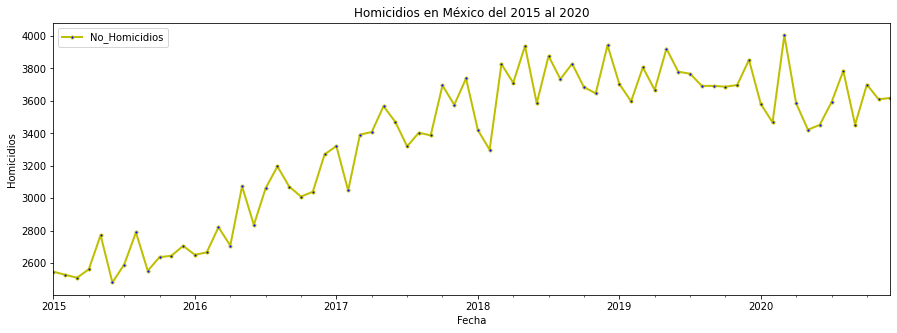

In [39]:

datos_st2.plot(figsize=(15,5), title = 'Homicidios en México del 2015 al 2020', 
              xlabel='Fecha', ylabel='Homicidios', linewidth=2, color='y',
              marker='o', markersize=3,  markerfacecolor='b')

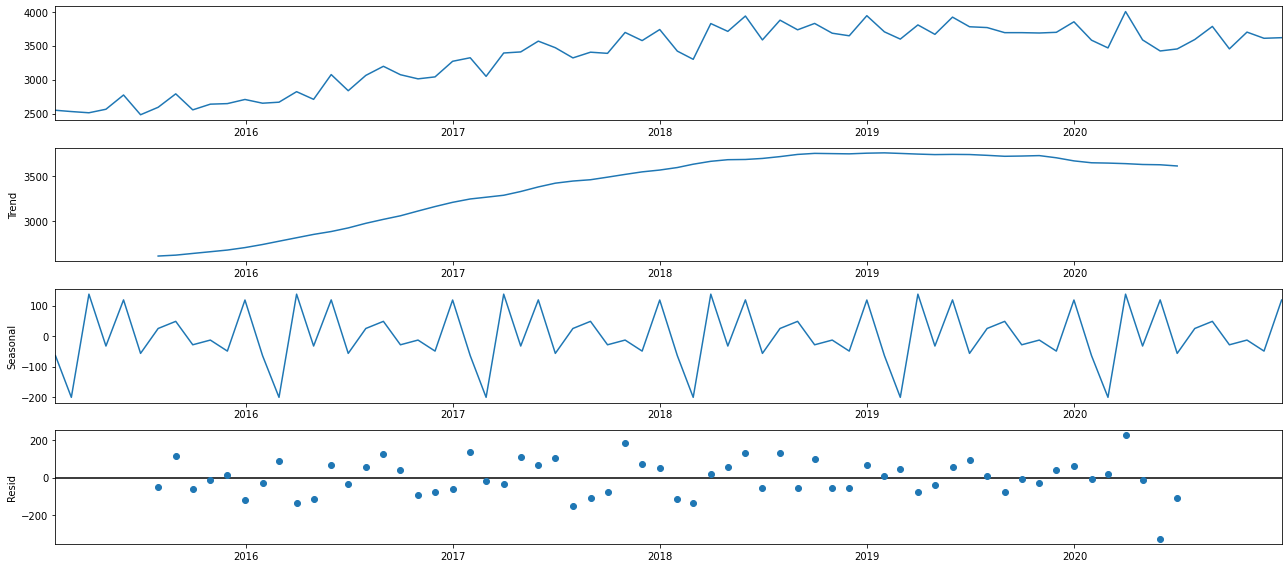

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize']= 18, 8

decompose_data = seasonal_decompose(datos_st2, model="additive")
decompose_data.plot();

In [41]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(datos_st2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.073048935944972
2. P-Value :  0.2554889143531647
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 67
5. Critical Values :
	 1% :  -3.5319549603840894
	 5% :  -2.905755128523123
	 10% :  -2.5903569458676765


In [42]:
### ponce

In [43]:
# No es estacionaria, hacer que sea estacionaria

In [44]:
datos_st2['No_Homicidios_shift1'] = datos_st2['No_Homicidios'].shift(1)

In [45]:
datos_st2

,No_Homicidios,No_Homicidios_shift1
Dates,,
2015-01-31,2548,NaN
2015-02-28,2529,2548.0
2015-03-31,2511,2529.0
2015-04-30,2563,2511.0
2015-05-31,2773,2563.0
...,...,...
2020-08-31,3784,3591.0
2020-09-30,3453,3784.0
2020-10-31,3700,3453.0


In [46]:
# Generar la diferencia de bits 

datos_st2['No_Homicidios_diff1'] = datos_st2['No_Homicidios']-datos_st2['No_Homicidios_shift1']
datos_st2

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1
Dates,,,
2015-01-31,2548,NaN,NaN
2015-02-28,2529,2548.0,-19.0
2015-03-31,2511,2529.0,-18.0
2015-04-30,2563,2511.0,52.0
2015-05-31,2773,2563.0,210.0
...,...,...,...
2020-08-31,3784,3591.0,193.0
2020-09-30,3453,3784.0,-331.0
2020-10-31,3700,3453.0,247.0


In [47]:
datos_st2_diff1= datos_st2.copy()
datos_st2_diff1

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1
Dates,,,
2015-01-31,2548,NaN,NaN
2015-02-28,2529,2548.0,-19.0
2015-03-31,2511,2529.0,-18.0
2015-04-30,2563,2511.0,52.0
2015-05-31,2773,2563.0,210.0
...,...,...,...
2020-08-31,3784,3591.0,193.0
2020-09-30,3453,3784.0,-331.0
2020-10-31,3700,3453.0,247.0


In [48]:
def viewing_stationarity(df, window=5):
    """Esta función genera un plot para una serie de tiempo
     con su media móvil y su desviación estándar.
    """
    rolmean = df.rolling(window=window).mean()
    rolstd = df.rolling(window=window).std()

    fig = plt.figure(figsize=(10,5))
    time_series = plt.plot(df, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='media movil')
    std = plt.plot(rolstd, color='green', label='desviacion estandar movil')
    plt.legend(loc='best')
    plt.show();

In [49]:
class Stationary:
    def __init__(self, significance=0.05):
        self.significance_level = significance
        self.pvalue = None
        self.is_stationary = None

    def ADF(self, values):
        result = adfuller(values, autolag='AIC')

        format_results = pd.Series(result[:4], 
                                index=['Statistic', 'P-value',
                                        'Num of Lags', 'Observations'])
        for k,v in result[4].items():
            format_results[f'Critical Value {k}'] = v

        return format_results

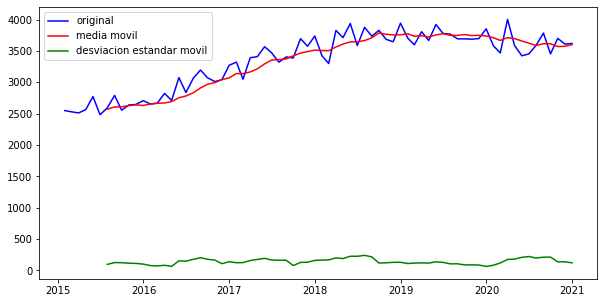

Statistic             -2.073049
P-value                0.255489
Num of Lags            4.000000
Observations          67.000000
Critical Value 1%     -3.531955
Critical Value 5%     -2.905755
Critical Value 10%    -2.590357
dtype: float64

In [50]:
viewing_stationarity(datos_st2['No_Homicidios'].dropna(), window=7)
adf_test = Stationary()
adf_test.ADF(datos_st2['No_Homicidios'].dropna().values).round(6)

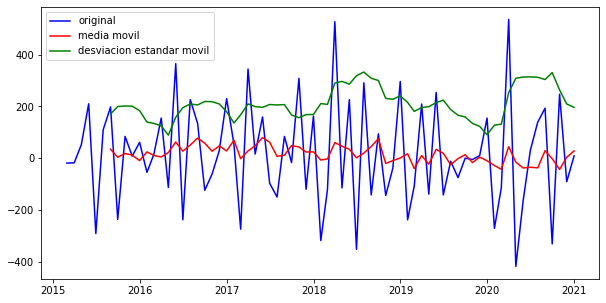

Statistic             -4.447682
P-value                0.000244
Num of Lags            4.000000
Observations          66.000000
Critical Value 1%     -3.533560
Critical Value 5%     -2.906444
Critical Value 10%    -2.590724
dtype: float64

In [51]:
viewing_stationarity(datos_st2['No_Homicidios_diff1'].dropna(), window=7)
adf_test = Stationary()
adf_test.ADF(datos_st2['No_Homicidios_diff1'].dropna().values).round(6)

In [52]:
## Aplicar el modelos SARIMAX 

In [79]:
model=sm.tsa.statespace.SARIMAX(datos_st2['No_Homicidios'],order=(4, 0, 3),seasonal_order=(4,0,3,8))
results=model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     No_Homicidios   No. Observations:                   72
Model:             SARIMAX(4, 0, 3)x(4, 0, 3, 8)   Log Likelihood                -465.358
Date:                           Fri, 25 Feb 2022   AIC                            960.716
Time:                                   17:28:59   BIC                            994.866
Sample:                               01-31-2015   HQIC                           974.311
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6642      0.451     -1.474      0.140      -1.547       0.219
ar.L2          0.7622      0.300      2.541      0.011       0.174       1.350
ar.L3          0.9540      0.332      2.870      0.004       0.302       1.606
ar.L4         -0.0523      0.411     -0.127      0.899      -0.857       0.753
ma.L1          1.0497      0.472      2.222      0.026       0.124       1.976
ma.L2         -0.0903      0.541     -0.167      0.867      -1.151       0.970
ma.L3         -0.5925      0.304     -1.947      0.051      -1.189       0.004
ar.S.L8        0.6246      3.892      0.160      0.873      -7.004       8.253
ar.S.L16       0.5116      2.849      0.180      0.858      -5.073       6.096
ar.S.L24      -0.2575      1.906     -0.135      0.893      -3.994       3.479
ar.S.L32      -0.2373      1.395     -0.170      0.865      -2.972       2.498
ma.S.L8       -0.5674      4.159     -0.136      0.891      -8.719       7.584
ma.S.L16      -0.4122      3.110     -0.133      0.895      -6.508       5.684
ma.S.L24       0.4115      2.345      0.175      0.861      -4.185       5.008
sigma2      2.571e+04   9982.065      2.575      0.010    6141.358    4.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.83   Prob(JB):                         0.71
Heteroskedasticity (H):               1.32   Skew:                            -0.09
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.53e+14. Standard errors may be unstable.
"""

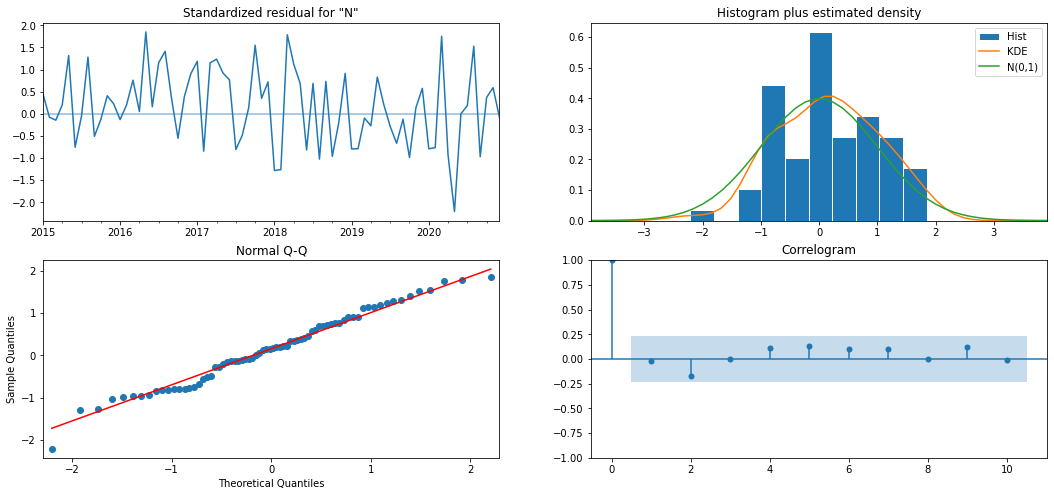

In [80]:
results.plot_diagnostics()
plt.show()

<AxesSubplot:xlabel='Dates'>

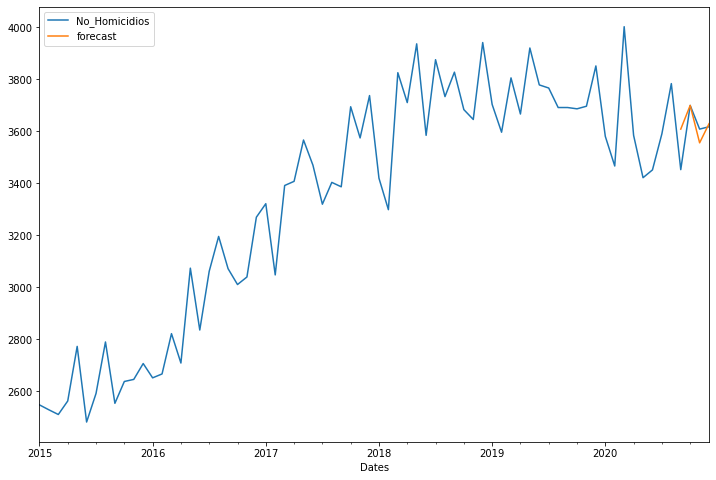

In [54]:
datos_st2['forecast']=results.predict(start=68,end=73,dynamic=True)
datos_st2[['No_Homicidios','forecast']].plot(figsize=(12,8))


In [55]:
from pandas.tseries.offsets import DateOffset
pred_date=[datos_st2.index[-1]+ DateOffset(months=x)for x in range(0,6)]
pred_date

[Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00')]

In [56]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=datos_st2.columns)
pred_date

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1,forecast
2021-01-31,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN


In [57]:
datos_predict = pd.concat([datos_st2,pred_date])
datos_predict

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1,forecast
2015-01-31,2548,NaN,NaN,NaN
2015-02-28,2529,2548.0,-19.0,NaN
2015-03-31,2511,2529.0,-18.0,NaN
2015-04-30,2563,2511.0,52.0,NaN
2015-05-31,2773,2563.0,210.0,NaN
...,...,...,...,...
2021-01-31,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN


<AxesSubplot:>

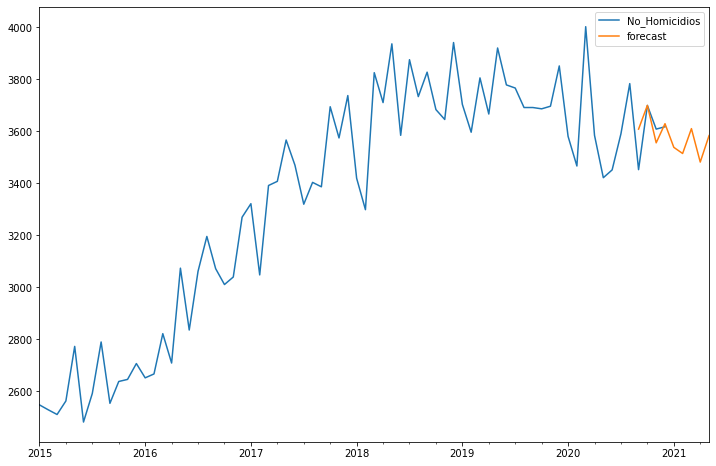

In [58]:
datos_predict['forecast'] = results.predict(start = 68, end = 76, dynamic= True)  
datos_predict[['No_Homicidios', 'forecast']].plot(figsize=(12, 8))

In [75]:
datos_st2_diff1

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1,forecast
Dates,,,,
2015-01-31,2548,NaN,NaN,NaN
2015-02-28,2529,2548.0,-19.0,NaN
2015-03-31,2511,2529.0,-18.0,NaN
2015-04-30,2563,2511.0,52.0,NaN
2015-05-31,2773,2563.0,210.0,NaN
...,...,...,...,...
2020-08-31,3784,3591.0,193.0,NaN
2020-09-30,3453,3784.0,-331.0,3608.881148
2020-10-31,3700,3453.0,247.0,3700.293767


In [59]:
### MODELO DIFERENCIADO

In [76]:
model_diff1=sm.tsa.statespace.SARIMAX(datos_st2_diff1['No_Homicidios_diff1'],order=(4, 0, 3),seasonal_order=(4,0,3,8))
results_diff1=model.fit()

<AxesSubplot:xlabel='Dates'>

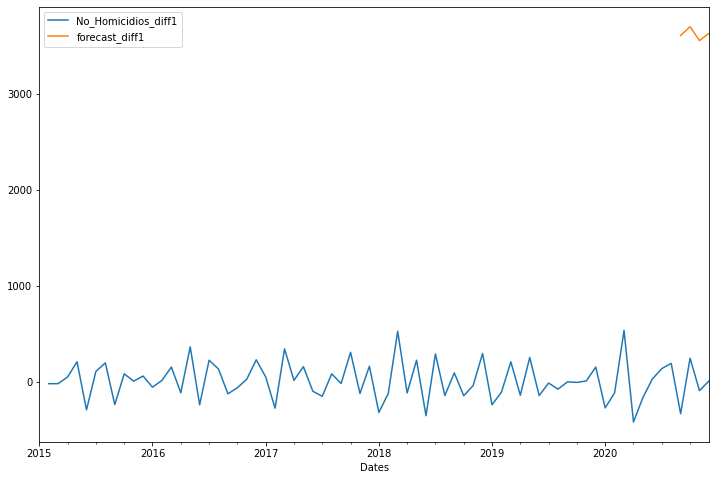

In [78]:
datos_st2_diff1['forecast_diff1']=results.predict(start=68,end=73,dynamic=True)
datos_st2_diff1[['No_Homicidios_diff1','forecast_diff1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Dates'>

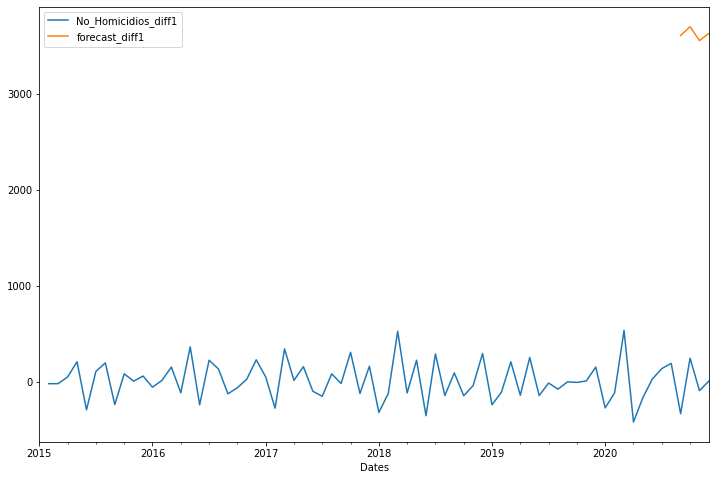

In [71]:
datos_st2['forecast_diff1']=results.predict(start=68,end=73,dynamic=True)
datos_st2[['No_Homicidios_diff1','forecast_diff1']].plot(figsize=(12,8))

In [62]:
from pandas.tseries.offsets import DateOffset
pred_date_diff1=[datos_st2.index[-1]+ DateOffset(months=x)for x in range(0,6)]
pred_date_diff1

[Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00')]

In [63]:
pred_date_diff1=pd.DataFrame(index=pred_date[1:],columns=datos_st2.columns)
pred_date_diff1

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1,forecast
"(nan, nan, nan, nan)",NaN,NaN,NaN,NaN
"(nan, nan, nan, nan)",NaN,NaN,NaN,NaN
"(nan, nan, nan, nan)",NaN,NaN,NaN,NaN
"(nan, nan, nan, nan)",NaN,NaN,NaN,NaN


In [64]:
datos_predict = pd.concat([datos_st2,pred_date])
datos_predict

,No_Homicidios,No_Homicidios_shift1,No_Homicidios_diff1,forecast
2015-01-31,2548,NaN,NaN,NaN
2015-02-28,2529,2548.0,-19.0,NaN
2015-03-31,2511,2529.0,-18.0,NaN
2015-04-30,2563,2511.0,52.0,NaN
2015-05-31,2773,2563.0,210.0,NaN
...,...,...,...,...
2021-01-31,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN


In [65]:
datos_predict['forecast'] = history.predict(start = 68, end = 73, dynamic= True)  
datos_predict[['No_Homicidios_diff1', 'forecast']].plot(figsize=(12, 8))

NameError: name 'history' is not defined

In [ ]:
history.plot_diagnostics()
plt.show()

In [ ]:
datos_st2['forecast']=results.predict(start=68,end=76,dynamic=True)
datos_st2[['No_Homicidios_diff1','forecast']].plot(figsize=(12,8))

## Prueba z para Guanajuato

In [ ]:
guanajuato = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Guanajuato']['Total_homicidios']

In [ ]:
ztest(guanajuato, value=48.76165797412851)  

In [ ]:
guanajuato.describe()

## Prueba z para Tlaxcala

In [ ]:
tlaxcala = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Tlaxcala']['Total_homicidios']

In [ ]:
tlaxcala.describe()

In [ ]:
ztest(tlaxcala, value= 48.76165797412851)  

### Prueba z para Ciudad de Mexico

In [ ]:
cd_mexico = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Ciudad de México']['Total_homicidios']

In [ ]:
cd_mexico.sum()

In [ ]:
cd_mexico.describe()

In [ ]:
ztest(cd_mexico, value= 48.76165797412851)  

In [ ]:
#prueba t 

t_test, p_value = stats.ttest_1samp(cd_mexico, mean)

In [ ]:
print (t_test, p_value)

In [ ]:
#plt.hist(homi_2020['Total_homicidios'])
#plt.hist(guanajuato)

In [ ]:
plt.figure()
sns.distplot(x=homicidios_2020, kde=True, color='g');
sns.distplot(x=guanajuato, kde=True, color='b')
plt.show;

In [ ]:
n = 58.5
x_bar = cd_mexico.sum()/n
error_estandar = std / np.sqrt(n)
estadistico = x_bar - mean / error_estandar
x_bar

In [ ]:
estadistico

### Prueba z para Guerrero

In [ ]:
### Prueba z para Ciudad de Mexico

guerrero = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Guerrero']['Total_homicidios']

cd_mexico.describe()

ztest(guerrero, value= 48.76165797412851)  

In [ ]:
guerrero.describe()

In [ ]:
chihuahua = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Chihuahua']['Total_homicidios']

#cd_mexico.describe()

ztest(chihuahua, value= 48.76165797412851)  

In [ ]:
chihuahua.describe()

In [ ]:
jalisco = data_hipot_fil[data_hipot_fil.loc[:,'Entidad'] =='Jalisco']['Total_homicidios']

#cd_mexico.describe()

ztest(jalisco, value= 48.76165797412851)  

In [ ]:
jalisco.describe()